# Data Science and Machine Learning on Fuel Efficiency Daataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("FuelEfficiency.csv")
data.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


In [4]:
data.describe()

,Eng Displ,Cylinders,CityMPG,HwyMPG,CombMPG,# Gears
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,3.092061,5.493036,20.442897,27.760446,23.139276,7.147632
std,1.344572,1.752251,5.298504,5.607924,5.368443,1.507929
min,1.400000,3.000000,9.000000,14.000000,11.000000,1.000000
25%,2.000000,4.000000,17.000000,24.000000,19.000000,6.000000
50%,3.000000,6.000000,20.000000,27.000000,23.000000,7.000000
75%,3.600000,6.000000,23.000000,31.000000,26.000000,8.000000
max,8.000000,16.000000,57.000000,59.000000,58.000000,10.000000


## Conditional Probability 

In [35]:
cylinder=data['Cylinders'].value_counts().to_dict()
print(cylinder)

{4: 323, 6: 243, 8: 127, 3: 14, 12: 10, 16: 1}


In [36]:
meanMPG=data['CombMPG'].mean()
print(meanMPG)

23.139275766016713


In [37]:
data['Compare_MPG']=(data['CombMPG']> meanMPG).astype(int)
data.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears,Compare_MPG
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8,0
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7,0
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8,0
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8,0
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8,0


In [38]:
data['Compare_MPG'].value_counts()

0    408
1    310
Name: Compare_MPG, dtype: int64

In [58]:
cylinder_6=(data.loc[data['Cylinders']==6,'Compare_MPG']).value_counts().to_dict()
total_c_6=0
for key in cylinder_6:
    total_c_6 += cylinder_6[key]

In [40]:
MPG_gl = data.loc[data['Compare_MPG'] > 0, 'Cylinders']
MPG_g = MPG_gl.value_counts().to_dict()

In [41]:
MPG_g[6]

35

Let's play with conditional probability.

First let's compute P(E|F), where E is "mileage greater than average" and F is "no of cylinders are 6". The probability of "6 cylinder car having mileage grater than average"  is just the percentage of 6 cylinder cars with mileage greater than average.

In [59]:
PEF = float(cylinder_6[1]) / float(total_c_6)
print('P(mileage>average | no of cylinder 6 ): ' + str(PEF))

P(mileage>average | no of cylinder 6 ): 0.1440329218106996


P(F) is just the probability of having 6 cylinders in this data set:

In [46]:
totalcar = 0
for key in cylinder:
    totalcar += cylinder[key]
print(totalcar)

718


In [49]:
PF = float(cylinder[6]) / totalcar
print("P(no.of cylinders =6): " +  str(PF))

P(no.of cylinders =6): 0.3384401114206128


And P(E) is the probability that mileage is more than average regardless of cylinder:

In [48]:
MPG_g_sum=0
for key in MPG_g:
    MPG_g_sum += MPG_g[key]
print(MPG_g_sum)

310


In [51]:
PE = float(MPG_g_sum) / totalcar
print("P(Above average Mileage):" + str(PE))

P(Above average Mileage):0.43175487465181056


If E and F were independent, then we would expect P(E | F) to be about the same as P(E). But they're not; P(E) is 0.43, and P(E|F) is 0.144. So, that tells us that E and F are dependent (which we know they are in this example.)

P(E,F) is different from P(E|F). P(E,F) would be the probability of car being above average mileage and having 6 cylinders, out of the total cars. 

In [62]:
print("P(Milege above average, cylinder =6)" + str(float(cylinder_6[1]) / totalcar))

P(Milege above average, cylinder =6)0.04874651810584958


Let's also compute the product of P(E) and P(F), P(E)P(F):

In [63]:
print("P(Mileage above average)P(cylinder =6)" + str(PE * PF))

P(Mileage above average)P(cylinder =6)0.14612316788355148


Something you may learn in stats is that P(E,F) = P(E)P(F), but this assumes E and F are independent. We've found here that P(E,F) is about 0.05, while P(E)P(F) is about 0.075. So when E and F are dependent - and we have a conditional probability going on - we can't just say that P(E,F) = P(E)P(F).

We can also check that P(E|F) = P(E,F)/P(F), which is the relationship we showed in the slides - and sure enough, it is:

In [65]:
print((MPG_g[6] / totalcar) / PF)

0.1440329218106996


## Your Assignment

Modify the code above such that the purchase probability does NOT vary with age, making E and F actually independent.

Then, confirm that P(E|F) is about the same as P(E), showing that the conditional probability of purchase for a given age is not any different than the a-priori probability of purchase regardless of age.


In [ ]:
data['# Gears'].value_counts()
MPG_Gears=(data.loc[data['Compare_MPG']==1,'# Gears']).value_counts().to_dict()

In [68]:
MPG_Gears

{6: 104, 8: 104, 7: 47, 9: 26, 1: 17, 5: 7, 10: 5}

## Regression Model

Taking 2 features of the data Eng. Displacement and CombMPG

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
Eng_disp = data['Eng Displ']
Comb_MPG = data['CombMPG']

<function matplotlib.pyplot.show(close=None, block=None)>

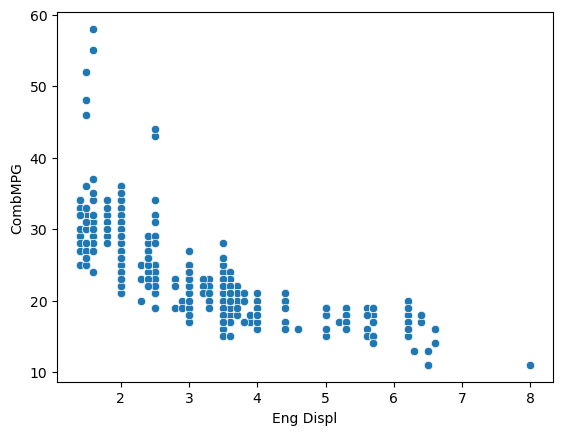

In [9]:
sns.scatterplot(x=Eng_disp,y=Comb_MPG)
plt.show

In [11]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(Eng_disp,Comb_MPG,test_size=0.3,random_state=0) 
x=np.array(X_train)
y=np.array(Y_train)

In [53]:
from scipy.optimize import curve_fit
def exponential_func(x, a, b):
    return a * np.exp(b * x)
params, covariance = curve_fit(exponential_func, x, y)

In [58]:
def inverse_func(x,a,b):
    y= a*(b/x)
    return y
params, covariance = curve_fit(inverse_func, x, y)

In [59]:
print(params)
print(covariance)

[9.54520673 5.96226215]
[[ 1.90171425e+14 -1.18960639e+14]
 [-1.18960639e+14  7.44151419e+13]]


In [60]:
Y_pred=inverse_func(xp,params[0],params[1])

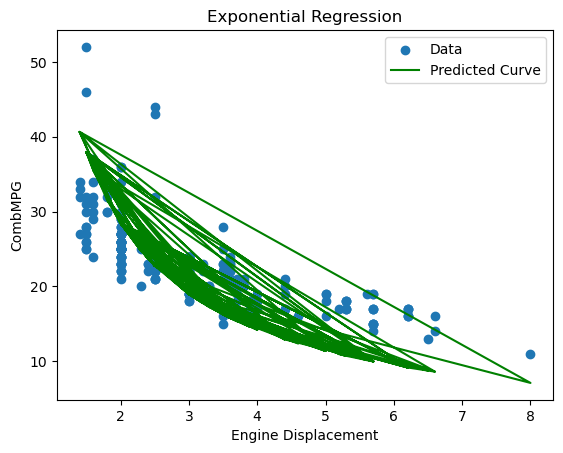

In [61]:
plt.scatter(xp,yp,label='Data')
plt.plot(xp,Y_pred,label='Predicted Curve',color='green')
plt.legend()
plt.xlabel('Engine Displacement')
plt.ylabel('CombMPG')
plt.title('Exponential Regression')
plt.show()

In [62]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test,Y_pred)
print(r2)

0.03814650107099138
